In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_cust=pd.read_csv("customer_data.csv")
df_pay=pd.read_csv("payment_data.csv")

In [3]:
df_cust

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [4]:
df_pay

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04-12-2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04-12-2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04-12-2016,840000.0,700500.0,22-04-2016
3,54988608,0,0,0,0,3,10,37400.0,03-12-2016,8425.2,7520.0,25-04-2016
4,54987763,0,0,0,0,2,10,NaN,03-12-2016,15147.6,NaN,26-04-2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [5]:
cust = pd.merge(df_cust,df_pay,on='id')
cust

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31-01-2015,6657.6,18934.0,19-09-2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28-04-2009,153792.0,149387.0,10-08-2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,NaN,30-03-2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17-05-2007,0.0,46371.0,12-07-2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02-06-2016,15120.0,21500.0,19-04-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,10,13,NaN,06-04-2010,0.0,35500.0,06-03-2011
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,1,10,NaN,27-04-2008,-121.2,601.0,NaN
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,12,2,NaN,01-12-2015,334130.4,2400500.0,12-01-2015
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,7,1,NaN,18-07-2015,456098.4,406938.0,22-12-2015


In [6]:
cust.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

In [7]:
cust['fea_2']=cust['fea_2'].fillna(cust['fea_2'].mean())
cust['update_date']=cust['update_date'].fillna(method='ffill')
cust['report_date']=cust['report_date'].fillna(method='ffill')
cust['highest_balance']=cust['highest_balance'].fillna(cust['highest_balance'].mean())

In [8]:
cust.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2                 0
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date           0
new_balance           0
highest_balance       0
report_date           0
dtype: int64

In [9]:
cust.drop(labels=['prod_limit'], axis=1, inplace=True)

In [10]:
cust.shape

(8250, 23)

In [11]:
cust.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,9,10,31-01-2015,6657.6,18934.0,19-09-2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,18,10,28-04-2009,153792.0,149387.0,10-08-2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,1,5,30-03-2009,0.0,150500.0,10-08-2015
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,2,26,11906,6,10,17-05-2007,0.0,46371.0,12-07-2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,4,6,02-06-2016,15120.0,21500.0,19-04-2016


In [12]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            8250 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   float64
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   int64  
 17  pay_normal    

In [13]:
cust.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance,highest_balance
count,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8.250000e+03,8.250000e+03
mean,0.168121,5.782173e+07,5.522667,1286.156813,2.319636,1.386712e+05,1.940848,11.013939,4.881091,100.026303,...,188575.384848,153.030672,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,1.054042e+05,2.192027e+05
std,0.373997,1.822724e+06,1.388358,48.654347,0.887414,1.081565e+05,0.235922,2.694611,3.031902,12.540081,...,167030.877718,122.082517,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,1.887704e+06,2.743875e+06
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,...,60000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.030320e+04,5.010000e+02
25%,0.000000,5.499050e+07,4.000000,1253.000000,1.000000,7.700000e+04,2.000000,8.000000,5.000000,90.000000,...,60047.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000e+00,2.449925e+04
50%,0.000000,5.898905e+07,5.000000,1286.156813,3.000000,1.110000e+05,2.000000,11.000000,5.000000,105.000000,...,72000.000000,184.724119,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,0.000000e+00,4.723550e+04
75%,0.000000,5.899655e+07,7.000000,1314.500000,3.000000,1.510000e+05,2.000000,12.000000,5.000000,110.000000,...,350020.000000,220.227156,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,2.494800e+04,1.295000e+05
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,...,650070.000000,707.106781,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,1.632120e+08,1.800005e+08


In [14]:
cust.duplicated().value_counts()

False    8159
True       91
Name: count, dtype: int64

In [15]:
cust=cust.drop_duplicates()

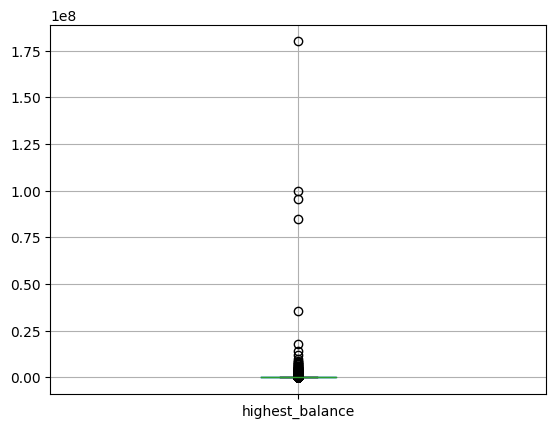

In [16]:
cust.boxplot(column='highest_balance')
plt.show()

In [17]:
Q1 = cust['highest_balance'].quantile(0.25)
Q3 = cust['highest_balance'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold by defining a range around the IQR
k = 1.5
lower_threshold = Q1 - (k * IQR)
upper_threshold = Q3 + (k * IQR)

# Replace values outside the threshold with the nearest value within the range
cust['highest_balance'] = cust['highest_balance'].apply(lambda x: min(max(x, lower_threshold), upper_threshold))

C:\Users\Harshini\AppData\Local\Temp\ipykernel_20964\3558902023.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['highest_balance'] = cust['highest_balance'].apply(lambda x: min(max(x, lower_threshold), upper_threshold))


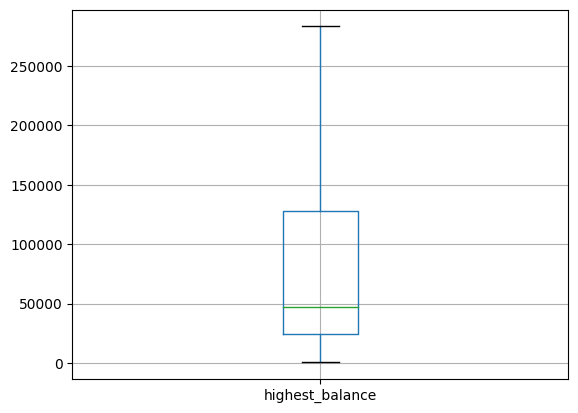

In [18]:
cust.boxplot(column='highest_balance')
plt.show()

In [19]:
cust['update_date']=pd.to_datetime(cust['update_date'])
cust['update_year']=cust['update_date'].dt.year
cust['update_month']=cust['update_date'].dt.month
cust['update_day']=cust['update_date'].dt.day
cust.drop(labels=['update_date'], axis=1, inplace=True)

C:\Users\Harshini\AppData\Local\Temp\ipykernel_20964\3642912695.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cust['update_date']=pd.to_datetime(cust['update_date'])
C:\Users\Harshini\AppData\Local\Temp\ipykernel_20964\3642912695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['update_date']=pd.to_datetime(cust['update_date'])
C:\Users\Harshini\AppData\Local\Temp\ipykernel_20964\3642912695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [20]:
cust['report_date']=pd.to_datetime(cust['report_date'])
cust['report_year']=cust['report_date'].dt.year
cust['report_month']=cust['report_date'].dt.month
cust['report_day']=cust['report_date'].dt.day
cust.drop(labels=['report_date'], axis=1, inplace=True)

C:\Users\Harshini\AppData\Local\Temp\ipykernel_20964\3710150620.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cust['report_date']=pd.to_datetime(cust['report_date'])
C:\Users\Harshini\AppData\Local\Temp\ipykernel_20964\3710150620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['report_date']=pd.to_datetime(cust['report_date'])
C:\Users\Harshini\AppData\Local\Temp\ipykernel_20964\3710150620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [21]:
cust

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,pay_normal,prod_code,new_balance,highest_balance,update_year,update_month,update_day,report_year,report_month,report_day
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,9,10,6657.6,18934.00,2015,1,31,2015,9,19
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,18,10,153792.0,149387.00,2009,4,28,2015,8,10
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,1,5,0.0,150500.00,2009,3,30,2015,8,10
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,6,10,0.0,46371.00,2007,5,17,2013,7,12
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,4,6,15120.0,21500.00,2016,6,2,2016,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,10,13,0.0,35500.00,2010,4,6,2011,3,6
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1,10,-121.2,601.00,2008,4,27,2011,3,6
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,12,2,334130.4,283299.25,2015,12,1,2015,1,12
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,7,1,456098.4,283299.25,2015,7,18,2015,12,22


In [22]:
X = cust.drop('label', axis=1)
y = cust['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9436274509803921

In [25]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

In [27]:
accuracy1 = metrics.accuracy_score(y_test, y_pred)
accuracy1

0.8339460784313726

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1341   20]
 [  17  254]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1361
           1       0.93      0.94      0.93       271

    accuracy                           0.98      1632
   macro avg       0.96      0.96      0.96      1632
weighted avg       0.98      0.98      0.98      1632



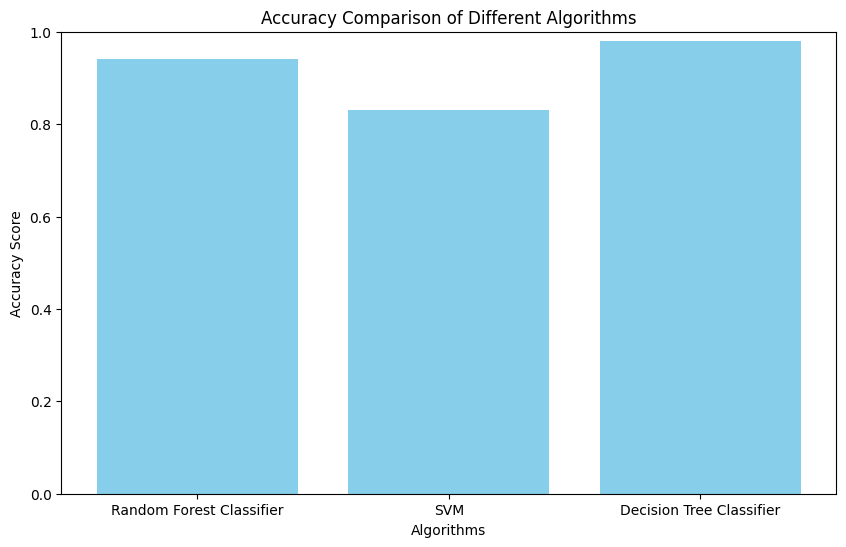

In [32]:
import matplotlib.pyplot as plt
accuracy_scores = {
    'Random Forest Classifier': 0.94,
    'SVM': 0.83,
    'Decision Tree Classifier': 0.98
}


algorithms = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())


plt.figure(figsize=(10, 6))
plt.bar(algorithms, scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0.0, 1.0)  # Set y-axis limits
plt.show()


In [36]:
import pickle
pkl_file="credit.pkl"
with open('pkl_file', 'wb') as file:
    pickle.dump(model, file)

In [37]:
with open('pkl_file', 'rb') as file:
    model_ = pickle.load(file)